In [176]:
import pandas as pd
import numpy as np

import os

from datetime import datetime 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [177]:
# open df_fake
df_fake = pd.read_csv(r'.\Fake.csv')

In [178]:
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [179]:
df_fake.dtypes

title      object
text       object
subject    object
date       object
dtype: object

In [180]:
df_fake.date

0        December 31, 2017
1        December 31, 2017
2        December 30, 2017
3        December 29, 2017
4        December 25, 2017
               ...        
23476     January 16, 2016
23477     January 16, 2016
23478     January 15, 2016
23479     January 14, 2016
23480     January 12, 2016
Name: date, Length: 23481, dtype: object

In [181]:
# checking which years are included in df_fake.
df_fake[(df_fake.date.str.contains('2017'))]

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23076,SOUR GRAPES? Whatever happened to the ‘smooth ...,Andrew Malcolm McClatchy News You better stop...,Middle-east,"January 3, 2017"
23077,HACKING DEMOCRACY? CIA Accusing Russia of Doin...,Peter Certo Other WordsEven in an election yea...,Middle-east,"January 3, 2017"
23078,Good News for Silver in 2017,James Burgess Oil PricePrecious metals are an...,Middle-east,"January 3, 2017"
23079,Gerald Celente: Top 10 Trends for 2017,"What can we expect in 2017? Inflated markets, ...",Middle-east,"January 2, 2017"


In [182]:
df_fake.subject.unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [183]:
df_fake.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [184]:
df_fake.subject.value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [185]:
# make label column to indicate article is 'FAKE'
df_fake['label_REAL'] = 0

In [186]:
df_fake.head()

,title,text,subject,date,label_REAL
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [187]:
# open df_true 
df_true = pd.read_csv(r'.\true.csv')

In [188]:
df_true.subject.unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [189]:
df_true.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [190]:
df_true.subject.value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [191]:
# make label column to indicate article is 'TRUE'
df_true['label_REAL'] = 1

In [192]:
# df_true does not contain 2015 articles. 
df_true[(df_true.date.str.contains('2015'))]

,title,text,subject,date,label_REAL


In [193]:
df_concat = pd.concat([df_fake, df_true], axis = 0)

In [194]:
df_concat.reset_index(drop=True, inplace=True)

In [195]:
df_concat.isna().sum()

title         0
text          0
subject       0
date          0
label_REAL    0
dtype: int64

In [196]:
df_concat.dtypes

title         object
text          object
subject       object
date          object
label_REAL     int64
dtype: object

In [197]:
df_concat.label_REAL.value_counts()

0    23481
1    21417
Name: label_REAL, dtype: int64

In [198]:
df_concat.loc[0]

title          Donald Trump Sends Out Embarrassing New Year’...
text          Donald Trump just couldn t wish all Americans ...
subject                                                    News
date                                          December 31, 2017
label_REAL                                                    0
Name: 0, dtype: object

In [199]:
df_concat.duplicated().sum()

209

# Open another csv with both real or fake news.

In [200]:
# check fake_or_real_news
fake_or_real_news = pd.read_csv(r'fake_or_real_news.csv')

In [201]:
# fake = 0
# Real = 1
fake_or_real_news

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [202]:
del fake_or_real_news['Unnamed: 0']

In [203]:
fake_or_real_news = pd.get_dummies(data=fake_or_real_news, columns=['label'], drop_first=True)

In [204]:
fake_or_real_news

,title,text,label_REAL
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,1
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,0
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,0
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",1


In [205]:
fake_or_real_news['subject'] =np.nan
fake_or_real_news['date'] =np.nan

In [206]:
fake_or_real_news.columns

Index(['title', 'text', 'label_REAL', 'subject', 'date'], dtype='object')

In [207]:
fake_or_real_news = fake_or_real_news[['title', 'text','subject', 'date', 'label_REAL']]

In [208]:
fake_or_real_news

,title,text,subject,date,label_REAL
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",NaN,NaN,0
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,NaN,NaN,0
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,NaN,NaN,1
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",NaN,NaN,0
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,NaN,NaN,1
...,...,...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,NaN,NaN,1
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,NaN,NaN,0
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,NaN,NaN,0
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",NaN,NaN,1


In [2]:
df_merged = pd.concat([df_concat, fake_or_real_news], axis = 0)

NameError: name 'df_concat' is not defined

In [ ]:
df_merged

In [211]:
df_merged.dtypes

title         object
text          object
subject       object
date          object
label_REAL     int64
dtype: object

In [212]:
df_merged

,title,text,subject,date,label_REAL
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,NaN,NaN,1
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,NaN,NaN,0
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,NaN,NaN,0
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",NaN,NaN,1


In [213]:
df_merged = df_merged[(~df_merged.duplicated())]

In [214]:
df_final = df_merged.copy()

In [215]:
df_final.isna().sum()

title            0
text             0
subject       6306
date          6306
label_REAL       0
dtype: int64

In [216]:
df_final.duplicated().sum()

0

# Fixing the date time column

In [217]:
df_concat.date= df_concat.date.str.replace('January','Jan').str.replace('February','Feb').str.replace('March','Mar').str.replace('April','Apr').str.replace('June','Jun').str.replace('July','Jul').str.replace('August','Aug').str.replace('September','Sep').str.replace('October','Oct').str.replace('November','Nov').str.replace('December','Dec')

In [218]:
df_concat.date= df_concat.date.str.replace(',', '')
df_concat.date= df_concat.date.str.replace('-', ' ')

In [219]:
pd.set_option('display.max_rows', 10)
df_concat.date

0         Dec 31 2017
1         Dec 31 2017
2         Dec 30 2017
3         Dec 29 2017
4         Dec 25 2017
             ...     
44893    Aug 22 2017 
44894    Aug 22 2017 
44895    Aug 22 2017 
44896    Aug 22 2017 
44897    Aug 22 2017 
Name: date, Length: 44898, dtype: object

In [220]:
df_concat

,title,text,subject,date,label_REAL
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,Dec 31 2017,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,Dec 31 2017,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,Dec 30 2017,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,Dec 29 2017,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,Dec 25 2017,0
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,Aug 22 2017,1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,Aug 22 2017,1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,Aug 22 2017,1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,Aug 22 2017,1


In [221]:
df_concat.date

0         Dec 31 2017
1         Dec 31 2017
2         Dec 30 2017
3         Dec 29 2017
4         Dec 25 2017
             ...     
44893    Aug 22 2017 
44894    Aug 22 2017 
44895    Aug 22 2017 
44896    Aug 22 2017 
44897    Aug 22 2017 
Name: date, Length: 44898, dtype: object

In [222]:
df_concat.date= df_concat.date.str.replace('January','Jan').str.replace('February','Feb').str.replace('March','Mar').str.replace('April','Apr').str.replace('June','Jun').str.replace('July','Jul').str.replace('August','Aug').str.replace('September','Sep').str.replace('October','Oct').str.replace('November','Nov').str.replace('December','Dec')

In [223]:
import re
df_concat['month']= df_concat.date.str.findall('([A-Z][a-z]{0,2})\s')
df_concat['month'] = df_concat['month'].astype(str)
df_concat['month'] = df_concat['month'].str.replace('\[', '').str.replace('\]', '')
df_concat['month'] = df_concat['month'].str.replace("'", '')
df_concat['month']

<ipython-input-223-1d0ce7092439>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_concat['month'] = df_concat['month'].str.replace('\[', '').str.replace('\]', '')


0        Dec
1        Dec
2        Dec
3        Dec
4        Dec
        ... 
44893    Aug
44894    Aug
44895    Aug
44896    Aug
44897    Aug
Name: month, Length: 44898, dtype: object

In [224]:
df_concat['day'] = df_concat.date.str.findall('(\s[0-9]{0,2}\s)')
df_concat['day'] = df_concat['day'].astype(str)
df_concat['day'] = df_concat['day'].str.replace('\[', '').str.replace('\]', '').str.replace(' ', '')
df_concat['day'] = df_concat['day'].str.replace("'", '')
df_concat['day']

<ipython-input-224-42bbc70f60d0>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_concat['day'] = df_concat['day'].str.replace('\[', '').str.replace('\]', '').str.replace(' ', '')


0        31
1        31
2        30
3        29
4        25
         ..
44893    22
44894    22
44895    22
44896    22
44897    22
Name: day, Length: 44898, dtype: object

In [225]:
df_concat['year'] = df_concat.date.str.findall('[0-9]{4}')
df_concat['year'] = df_concat['year'].astype(str)
df_concat['year'] = df_concat['year'].str.replace('\[', '').str.replace('\]', '')
df_concat['year'] = df_concat['year'].str.replace("'", '')
df_concat['year']

<ipython-input-225-52155c890be5>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_concat['year'] = df_concat['year'].str.replace('\[', '').str.replace('\]', '')


0        2017
1        2017
2        2017
3        2017
4        2017
         ... 
44893    2017
44894    2017
44895    2017
44896    2017
44897    2017
Name: year, Length: 44898, dtype: object

In [226]:
df_concat = df_concat[(df_concat.month == "Jan")|(df_concat.month == "Feb")|(df_concat.month == "Mar")|(df_concat.month == "Apr")|(df_concat.month == "May")
         |(df_concat.month == "Jun")|(df_concat.month == "Jul")|(df_concat.month == "Aug")|(df_concat.month == "Sep")
         |(df_concat.month == "Oct")|(df_concat.month == "Nov")|(df_concat.month == "Dec")]

In [228]:
df_concat.month = df_concat.month.str.replace('Jan', '01').str.replace('Feb', '02').str.replace('Mar', '03').str.replace('Apr', '04').str.replace('May', '05').str.replace('Jun', '06').str.replace('Jul', '07').str.replace('Aug', '08').str.replace('Sep', '09').str.replace('Oct', '10').str.replace('Nov', '11').str.replace('Dec', '12') 

C:\Users\Quoc\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [229]:
df_concat['dates'] = df_concat['day'] + df_concat['month'] + df_concat['year']
df_concat['dates']= df_concat['dates'].str.replace('"', '').str.replace("'", '')

<ipython-input-229-b4485800a989>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat['dates'] = df_concat['day'] + df_concat['month'] + df_concat['year']
<ipython-input-229-b4485800a989>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat['dates']= df_concat['dates'].str.replace('"', '').str.replace("'", '')


In [230]:
df_concat['dates'] = pd.to_datetime(df.dates, format= '%d%b%Y')

<ipython-input-230-a9f8654e3a08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat['dates'] = pd.to_datetime(df.dates, format= '%d%b%Y')


In [231]:
df_concat['dates']

0       2017-12-31
1       2017-12-31
2       2017-12-30
3       2017-12-29
4       2017-12-25
           ...    
44893   2017-08-22
44894   2017-08-22
44895   2017-08-22
44896   2017-08-22
44897   2017-08-22
Name: dates, Length: 44888, dtype: datetime64[ns]

In [232]:
df_concat

,title,text,subject,date,label_REAL,month,day,year,dates
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,Dec 31 2017,0,12,31,2017,2017-12-31
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,Dec 31 2017,0,12,31,2017,2017-12-31
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,Dec 30 2017,0,12,30,2017,2017-12-30
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,Dec 29 2017,0,12,29,2017,2017-12-29
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,Dec 25 2017,0,12,25,2017,2017-12-25
...,...,...,...,...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,Aug 22 2017,1,08,22,2017,2017-08-22
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,Aug 22 2017,1,08,22,2017,2017-08-22
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,Aug 22 2017,1,08,22,2017,2017-08-22
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,Aug 22 2017,1,08,22,2017,2017-08-22


In [238]:
df_dates = df_concat[~(df_concat.duplicated())]

In [239]:
df_dates.duplicated().sum()

0

In [240]:
df_dates.shape

(44875, 9)

In [434]:
df_dates.drop('date', axis=1, inplace = True)

C:\Users\Quoc\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [435]:
df_dates

,title,text,subject,label_REAL,month,day,year,dates,num
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,0,12,31,2017,2017-12-31,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,0,12,31,2017,2017-12-31,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,0,12,30,2017,2017-12-30,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,0,12,29,2017,2017-12-29,1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,0,12,25,2017,2017-12-25,1
...,...,...,...,...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,1,08,22,2017,2017-08-22,1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,1,08,22,2017,2017-08-22,1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,1,08,22,2017,2017-08-22,1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,1,08,22,2017,2017-08-22,1


# Adding a count for each article 

In [436]:
df_dates['num']=1

<ipython-input-436-c935bec56043>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dates['num']=1


In [437]:
fake = df_dates[(df_dates.label_REAL == 0)]
fake.rename(columns = {'num':'num_fake'}, inplace =True)

C:\Users\Quoc\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [438]:
fake_year = fake.groupby(['year','month']).num_fake.sum().reset_index()

In [439]:
fake_year

,year,month,num_fake
0,,02,35
1,2015,03,8
2,2015,04,326
3,2015,05,338
4,2015,06,236
...,...,...,...
30,2017,08,795
31,2017,09,636
32,2017,10,605
33,2017,11,523


In [440]:
fake2016_count =fake_year[(fake_year.year == '2016')]

In [441]:
fake2016_count

,year,month,num_fake
11,2016,01,1081
12,2016,02,1020
13,2016,03,1088
14,2016,04,977
15,2016,05,1012
...,...,...,...
18,2016,08,892
19,2016,09,936
20,2016,10,1082
21,2016,11,1004


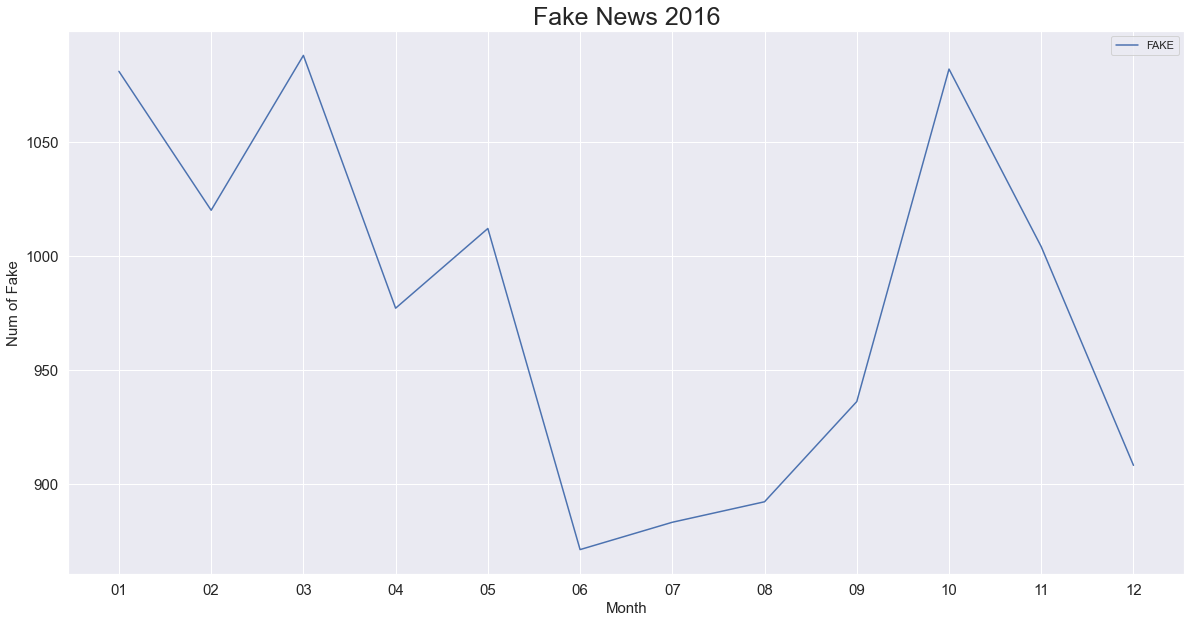

In [442]:
fig = plt.figure(figsize=(20,10))
sns.set()

plt.title('Fake News 2016', fontsize=25)
sns.lineplot(data = fake2016_count, x = 'month', y = 'num_fake', label = 'FAKE')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('Month', fontsize=15)
plt.ylabel('Num of Fake', fontsize=15)


plt.show()

In [443]:
real = df_dates[(df_dates.label_REAL == 1)]

In [444]:
real.rename(columns = {'num':'num_real'}, inplace = True)

C:\Users\Quoc\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [445]:
real_year = real.groupby(['year','month']).num_real.sum().reset_index()

In [446]:
real2016_count =real_year[(real_year.year == '2016')]

In [447]:
real2016_count

,year,month,num_real
0,2016,01,246
1,2016,02,432
2,2016,03,490
3,2016,04,383
4,2016,05,394
...,...,...,...
7,2016,08,265
8,2016,09,351
9,2016,10,336
10,2016,11,637


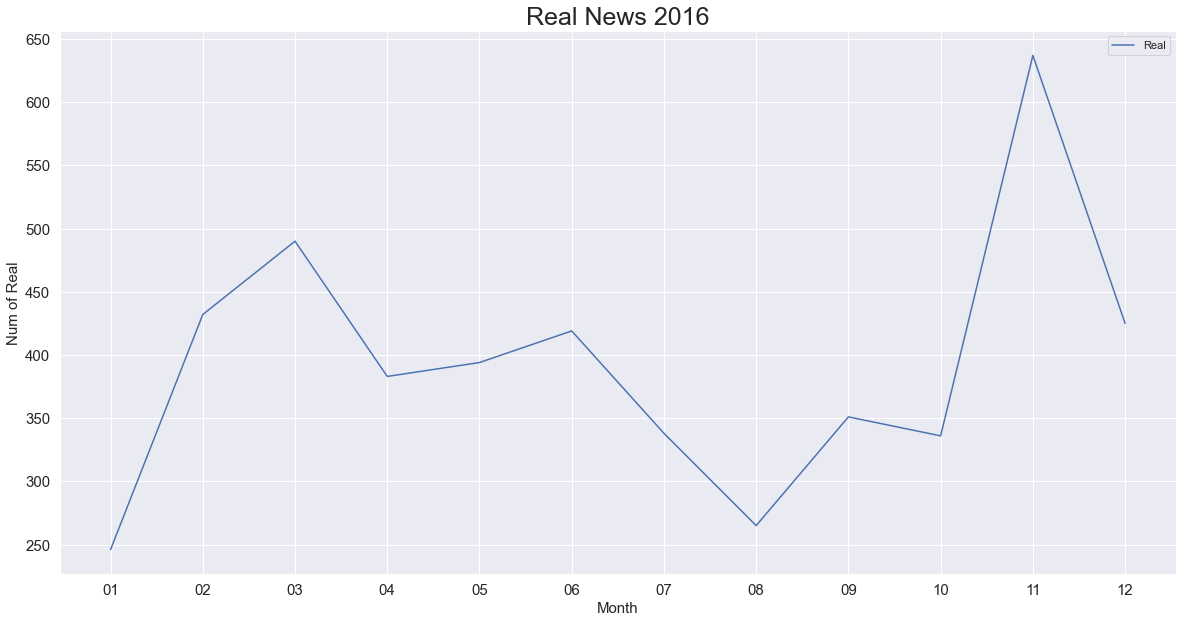

In [448]:
fig = plt.figure(figsize=(20,10))
sns.set()

plt.title('Real News 2016', fontsize = 25)
sns.lineplot(data = real2016_count, x = 'month', y = 'num_real', label = 'Real')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('Month', fontsize=15)
plt.ylabel('Num of Real', fontsize=15)


plt.show()

In [449]:
fake_date = df_dates[(df_dates.label_REAL == 0)]
fake_date.head()

,title,text,subject,label_REAL,month,day,year,dates,num
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,0,12,31,2017,2017-12-31,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,0,12,31,2017,2017-12-31,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,0,12,30,2017,2017-12-30,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,0,12,29,2017,2017-12-29,1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,0,12,25,2017,2017-12-25,1


In [450]:
fake_date1 = fake_date.groupby(['dates']).num.sum().reset_index()
fake_date1

,dates,num
0,2015-03-31,8
1,2015-04-01,2
2,2015-04-02,1
3,2015-04-04,5
4,2015-04-05,13
...,...,...
999,2017-12-27,15
1000,2017-12-28,6
1001,2017-12-29,20
1002,2017-12-30,15


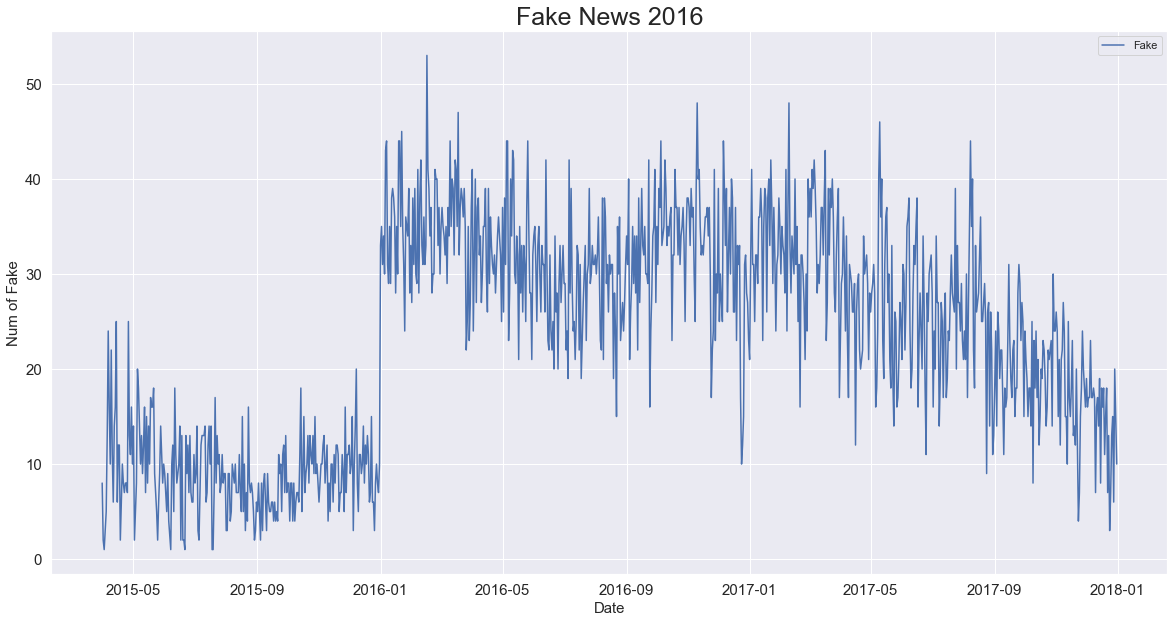

In [451]:
fig = plt.figure(figsize=(20,10))
sns.set()

plt.title('Fake News 2016', fontsize = 25)
sns.lineplot(data = fake_date1, x = 'dates', y = 'num', label = 'Fake')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('Date', fontsize=15)
plt.ylabel('Num of Fake', fontsize=15)


plt.show()

In [452]:
import matplotlib.patches as mpatches

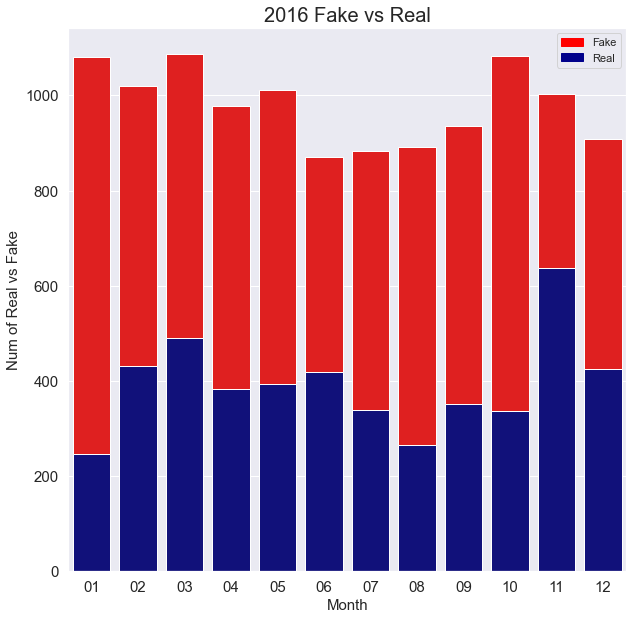

In [453]:
sns.set(style ='darkgrid')
plt.figure(figsize=(10,10))

plt.title('2016 Fake vs Real', fontsize=20)

bar1 = sns.barplot(data= fake2016_count, x="month", y='num_fake', color ='red')
bar2 = sns.barplot(data= real2016_count, x='month', y='num_real', estimator=sum, ci=None, color = 'darkblue')

top_bar = mpatches.Patch(color='red', label='Fake')
bottom_bar = mpatches.Patch(color='darkblue', label='Real')

plt.legend(handles=[top_bar, bottom_bar])

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('Month', fontsize=15)
plt.ylabel('Num of Real vs Fake', fontsize=15)


plt.show()

In [454]:
month_2016 =  pd.merge(fake2016_count, real2016_count, on = ['year', 'month'])
month_2016

,year,month,num_fake,num_real
0,2016,01,1081,246
1,2016,02,1020,432
2,2016,03,1088,490
3,2016,04,977,383
4,2016,05,1012,394
...,...,...,...,...
7,2016,08,892,265
8,2016,09,936,351
9,2016,10,1082,336
10,2016,11,1004,637


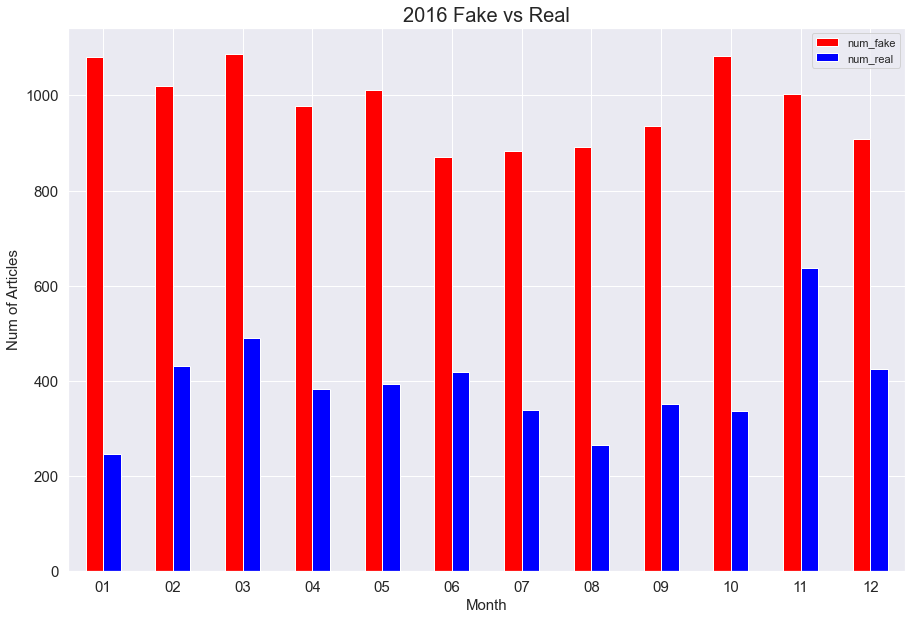

In [455]:
sns.set()

month_2016.plot.bar(figsize=(15,10),x='month', color = ['red', 'blue'])
plt.title('2016 Fake vs Real', fontsize=20)

plt.legend()

plt.xticks(rotation = 0, fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('Month', fontsize=15)
plt.ylabel('Num of Articles', fontsize=15)


plt.show()

In [456]:
fake_1617 = fake.groupby('year').num_fake.sum().reset_index()
fake_1617

,year,num_fake
0,,35
1,2015,2479
2,2016,11754
3,2017,9203


In [457]:
real_1617 = real.groupby('year').num_real.sum().reset_index()
real_1617

,year,num_real
0,2016,4716
1,2017,16688


In [458]:
rf_1617 = pd.merge(fake_1617, real_1617, on='year')

In [459]:
rf_1617

,year,num_fake,num_real
0,2016,11754,4716
1,2017,9203,16688


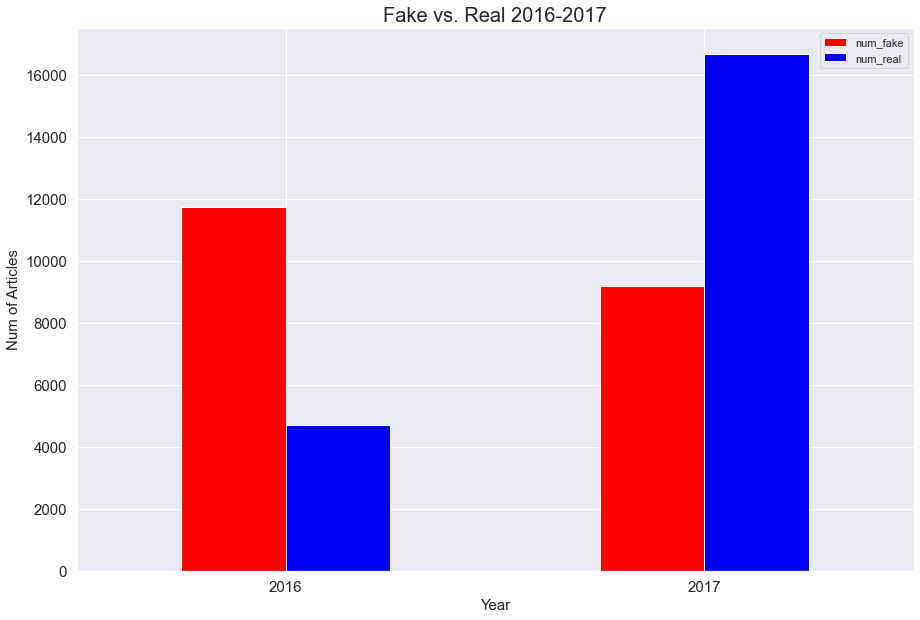

In [460]:
sns.set()

rf_1617.plot.bar(figsize=(15,10),x='year', color = ['red', 'blue'])
plt.title('Fake vs. Real 2016-2017', fontsize=20)

plt.legend()

plt.xticks(rotation = 0, fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('Year', fontsize=15)
plt.ylabel('Num of Articles', fontsize=15)


plt.show()

In [ ]:
# some explanations: usa presidential election

In [461]:
df_final.shape

(50995, 5)

# Split train test

In [462]:
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [463]:
x_train,x_test,y_train,y_test=train_test_split(df_final.text,
                                               df_final.label_REAL,
                                               test_size=0.2,
                                               random_state=7)

# TfidfVectorizer

In [464]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_vectorizer

TfidfVectorizer(max_df=0.7, stop_words='english')

In [465]:
tfidf_vectorizer.get_stop_words()

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [468]:
tfidf_train=tfidf_vectorizer.fit_transform(x_train)

In [469]:
tfidf_test=tfidf_vectorizer.transform(x_test)

# Model PassiveAggressiveClassifier

In [470]:
?PassiveAggressiveClassifier

In [471]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [472]:
y_pred_pac=pac.predict(tfidf_test)

In [473]:
confusion_matrix(y_test, y_pred)
print(f'Accuracy: {round(accuracy_score(y_test, y_pred_pac)*100,2)}%')
print(f'Precision: {round(precision_score(y_test, y_pred_pac)*100,2)}%')
print(f'Recall: {round(recall_score(y_test, y_pred_pac)*100,2)}%')
print(f'F1: {round(f1_score(y_test, y_pred_pac)*100,2)}%')

Accuracy: 97.53%
Precision: 98.05%
Recall: 96.77%
F1: 97.41%


In [474]:
confusion_matrix(y_test, y_pred_pac)

array([[5216,   94],
       [ 158, 4731]], dtype=int64)

In [475]:
# roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_pac)

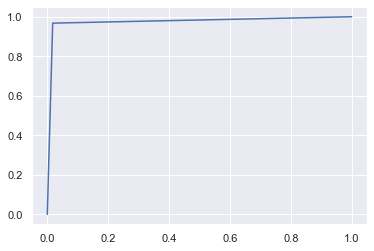

In [476]:
plt.plot(fpr, tpr)

In [477]:
roc_auc_score(y_test, y_pred_pac)

0.9749900522291673

In [478]:
dct_params = {
    *,
    C=1.0,
    fit_intercept=True,
    max_iter=1000,
    tol=0.001,
    early_stopping=False,
    validation_fraction=0.1,
    n_iter_no_change=5,
    shuffle=True,
    verbose=0,
    loss='hinge',
    n_jobs=None,
    random_state=None,
    warm_start=False,
    class_weight=None,
    average=False,
}

SyntaxError: invalid syntax (<ipython-input-478-a25941d1ed43>, line 2)

# Model SVM

In [479]:
from sklearn.svm import SVC

In [480]:
svc = SVC(kernel = 'linear')

In [481]:
svc.fit(tfidf_train[:2000], y_train[:2000])

SVC(kernel='linear')

In [482]:
y_pred_svc = svc.predict(tfidf_test[:2000])

In [483]:
confusion_matrix(y_test[:2000], y_pred_svc[:2000])
print(f'Accuracy: {round(accuracy_score(y_test[:2000], y_pred_svc[:2000])*100,2)}%')
print(f'Precision: {round(precision_score(y_test[:2000], y_pred_svc[:2000])*100,2)}%')
print(f'Recall: {round(recall_score(y_test[:2000], y_pred_svc[:2000])*100,2)}%')
print(f'F1: {round(f1_score(y_test[:2000], y_pred_svc[:2000])*100,2)}%')

Accuracy: 93.8%
Precision: 94.1%
Recall: 92.48%
F1: 93.28%


In [431]:
confusion_matrix(y_test[:2000], y_pred_svc[:2000])

array([[1015,   54],
       [  70,  861]], dtype=int64)

# SGD Classifier

In [484]:
from sklearn.linear_model import SGDClassifier

In [485]:
SGD = SGDClassifier(loss = 'modified_huber')
SGDC = SGD.fit(tfidf_train, y_train)

In [486]:
y_pred_sgdc = SGDC.predict(tfidf_test)

In [487]:
confusion_matrix(y_test, y_pred_sgdc)
print(f'Accuracy: {round(accuracy_score(y_test, y_pred_sgdc)*100,2)}%')
print(f'Precision: {round(precision_score(y_test, y_pred_sgdc)*100,2)}%')
print(f'Recall: {round(recall_score(y_test, y_pred_sgdc)*100,2)}%')
print(f'F1: {round(f1_score(y_test, y_pred_sgdc)*100,2)}%')

Accuracy: 97.11%
Precision: 97.87%
Recall: 96.05%
F1: 96.95%


In [488]:
confusion_matrix(y_test, y_pred_sgdc)

array([[5208,  102],
       [ 193, 4696]], dtype=int64)